# Task4 = Movie Review Sentiment Analysis

# Movie Review Sentiment Analysis

# 1.Load IMDB dataset

# importing all necessary liabraries

In [1]:
import pandas as pd        # Data manipulation and analysis
import numpy as np         # Numerical operations
import seaborn as sns      # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting with Matplotlib

# Display plots inline in Jupyter Notebook
%matplotlib inline

import warnings            # Handle warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages

In [3]:
pd.read_csv(r'C:\Users\admin\Downloads\archive\IMDB Dataset.csv')

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# loaded datset into DataFrame

In [6]:
df=pd.read_csv(r'C:\Users\admin\Downloads\archive\IMDB Dataset.csv')

# first five rows

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# shape of the data

In [12]:
df.shape

(50000, 2)

# 2. Clean text: remove stopwords, punctuation, lowercasing.

# Required Libraries

In [16]:
import string
import nltk
from nltk.corpus import stopwords

# NLTK stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Define stopwords set

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:

# Define clean_text function
def clean_text(text):
    if not isinstance(text, str):  # Handle missing or non-string data
        return ""

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)


# Applying to my DataFrame

In [24]:
df['clean_review'] = df['review'].apply(clean_text)

# Checking Result

In [29]:
print("Original:\n", df['review'][0])
print("\nCleaned:\n", df['clean_review'][0])

Original:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

# 3. Use VADER for sentiment polarity.

In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Defining Sentiment Function

In [33]:
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']  # Compound score: -1 to 1
    return score


# Applying to my DataFrame

In [35]:
df['vader_compound'] = df['clean_review'].apply(get_vader_sentiment)


# checking the result

In [37]:
df[['review', 'clean_review', 'vader_compound']].head()

,review,clean_review,vader_compound
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...,-0.9934
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...,0.9582
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,0.9520
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,-0.8858
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,0.9871


# 4. Classify reviews as Positive, Negative, or Neutral.

# Using VADER

In [40]:
df['vader_compound'] = df['clean_review'].apply(get_vader_sentiment)


# Classification Logic

In [51]:
def label_vader_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_compound'].apply(label_vader_sentiment)


# View sample predictions:

In [54]:
df[['review', 'clean_review', 'vader_compound', 'vader_sentiment']].sample(10)

,review,clean_review,vader_compound,vader_sentiment
38922,Okay...so I am gazing through my Mom and Dad's...,okayso gazing mom dads extensive dvd collectio...,0.9889,positive
42215,"This film is unusual and bizarre, and it is ne...",film unusual bizarre nearly unusual bizarre go...,-0.7351,negative
13651,"Jeez, only in the 70's... Antonio Margheriti b...",jeez 70s antonio margheriti brings us quirky h...,0.6735,positive
40876,"This is the ""Battlefield Earth"" of mini series...",battlefield earth mini series exceptions disas...,-0.9918,negative
6856,"Miraculously, this is actually quite watchable...",miraculously actually quite watchable mean bad...,-0.9701,negative
6126,I expected this movie was originally supposed ...,expected movie originally supposed show electi...,-0.9136,negative
24091,This film is quite boring. There are snippets ...,film quite boring snippets naked flesh tossed ...,-0.9268,negative
26704,The movie is more of a mockumentary of corrupt...,movie mockumentary corruption whole american s...,0.9578,positive
4319,Valley Girl is an exceptionally well made film...,valley girl exceptionally well made film allar...,0.8253,positive
12209,This show came to Canada via PBS in the mid 90...,show came canada via pbs mid 90s really really...,0.9695,positive


# 5. Add new column with sentiment label.

In [ ]:
#  allready adding 
df['vader_sentiment'] = df['vader_compound'].apply(label_vader_sentiment)

# to varifying

In [69]:
df[['vader_compound', 'vader_sentiment']].head()

,vader_compound,vader_sentiment
0,-0.9934,negative
1,0.9582,positive
2,0.9520,positive
3,-0.8858,negative
4,0.9871,positive


# 6. Count total positive, negative, neutral.

In [73]:
df['vader_sentiment'].value_counts()


vader_sentiment
positive    34011
negative    15441
neutral       548
Name: count, dtype: int64

# 7. Create pie chart or bar graph.

# Bar graph

<Figure size 800x500 with 0 Axes>

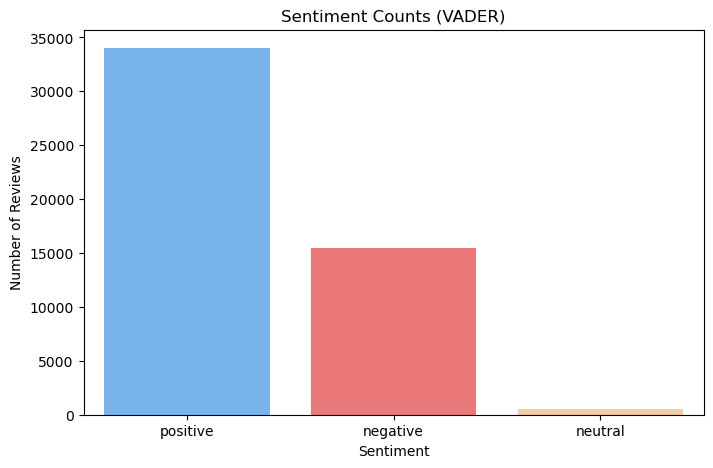

In [79]:
# --- Bar Graph ---
# Get counts
counts = df['vader_sentiment'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, palette=['#66b3ff','#ff6666','#ffcc99'])
plt.title('Sentiment Counts (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.savefig('sentiment_counts_bargraph.png') 
plt.show()

# pie chart

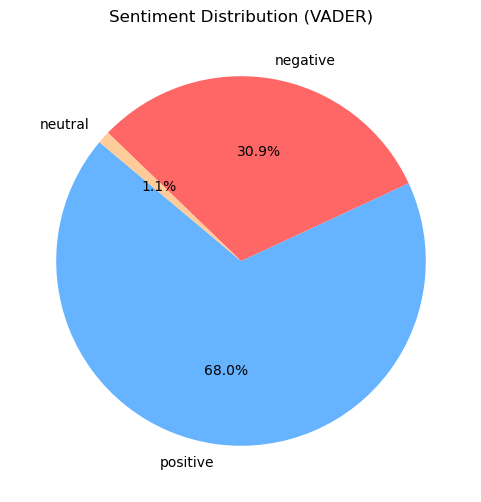

In [82]:
# Get counts
counts = df['vader_sentiment'].value_counts()

# --- Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666','#ffcc99'])
plt.title('Sentiment Distribution (VADER)')
plt.show()

# 8. Show top 3 positive and negative reviews.

# Top 3 positive reviews (highest compound scores)

In [86]:
top_positive = df.sort_values(by='vader_compound', ascending=False).head(3)
print("Top 3 Positive Reviews:")
print(top_positive[['review', 'vader_compound', 'vader_sentiment']])

Top 3 Positive Reviews:
                                                  review  vader_compound  \
42946  By now you've probably heard a bit about the n...          0.9998   
28525  Jim Carrey is back to much the same role that ...          0.9996   
6603   Romance is in the air and love is in bloom in ...          0.9996   

      vader_sentiment  
42946        positive  
28525        positive  
6603         positive  


# Top 3 negative reviews (lowest compound scores)

In [89]:
top_negative = df.sort_values(by='vader_compound').head(3)
print("\nTop 3 Negative Reviews:")
print(top_negative[['review', 'vader_compound', 'vader_sentiment']])


Top 3 Negative Reviews:
                                                  review  vader_compound  \
4447   I'm going to write about this movie and about ...         -0.9993   
9016   I watched SCARECROWS because of the buzz surro...         -0.9993   
13153  The name Uwe Boll is automatically linked to b...         -0.9993   

      vader_sentiment  
4447         negative  
9016         negative  
13153        negative  


# 9. Save final result to CSV.

In [92]:
df.to_csv('imdb_reviews_with_sentiment.csv', index=False)


# 10.create a UI to paste new review and check sentiment.

In [97]:
import streamlit as st
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (run once)
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def classify_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

st.title("IMDB Review Sentiment Analyzer")

# Text input for new review
user_review = st.text_area("Paste your review here:")

if st.button("Analyze Sentiment"):
    if user_review.strip() == "":
        st.warning("Please enter a review text.")
    else:
        score = sia.polarity_scores(user_review)['compound']
        sentiment = classify_vader(score)
        st.write(f"**Sentiment:** {sentiment.capitalize()}")
        st.write(f"**Compound Score:** {score}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2025-08-31 20:16:36.280 
  command:

    streamlit run C:\Users\admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-31 20:16:36.281 Session state does not function when running a script without `streamlit run`
